## Week 2:
 
New Topics:

 - Resources for help with coding 
 - Creating a reproducible workflow
 - Merging _pandas_ DataFrames
 - Additional _pandas_ methods 
 

Coding Tasks:

Start a new Jupyter Notebook to complete these tasks. This week, you'll be combining two different datasets.

First, you'll work with a dataset containing the number of primary care physicians per county for each county in the United States. It was obtained from the Area Health Resources File, published by the [Health Resources and Services Administration](https://data.hrsa.gov/topics/health-workforce/ahrf). This data is contained in the file `primary_care_physicians.csv`.

Second, the file `population_by_county.csv` contains the Census Bureau's 2019 population estimates for each US County. It also contains a column `urban`. The `urban` column uses data from the National Bureau of Economic Research to classify each county as either urban or rural. The U.S. Office of Management and Budget designates counties as metropolitan (a core urban area of 50,000 or more population), micropolitan (an urban core of at least 10,000 but less than 50,000 population), or neither. Here, a county is considered "urban" if it is part of a metropolitan or micropolitan area and "rural" if it is not.

 1. First, import the primary care physicians dataset (`primary_care_physicians.csv`) into a data frame named `physicians`. 
 2. Filter `physicians` down to just the counties in Tennessee. Save the filtered dataframe back to `physicians`. Verify that the resulting dataframe has 95 rows.
 3. Look at the distribution of the number of primary care physicians. What do you notice?
 4. Now, import the population by county dataset (`population_by_county.csv`) into a DataFrame named `population`.
 5. Merge the `physicians` DataFrame with the `population` DataFrame. Keep only the values for Tennessee. When you merge, be sure the include both the `population` and `urban` columns in the merged results. Save the result of the merge back to `physicians`.
 6. How many Tennessee counties are considered urban?
 7. The State Health Access Data Assistance Center (SHADAC) (https://www.shadac.org/) classifies counties into three groups based on the number of residents per primary care physician. First, counties with fewer than 1500 residents per primary care physician are considered to have an "adequate" supply. Counties with at least 1500 residents but fewer than 3500 residents per primary care physician are considered to have a "moderately inadequate" supply, and counties with at least 3500 residents per primary care physician are considered to have a "low inadequate" supply. How many counties in Tennessee are in each group? 
 8. Does there appear to be any detectable relationship between whether a county is urban or rural and its supply of primary care physicians?

Week 3:
New Topics:

Exploratory Data Analysis
Coding Task:

This week, you will build off of your work from last week.

First, (if you haven't done so already), create a new column indicating the SHADAC classification for each Tennessee county. You can use the following code to accomplish this:

physicians.loc[physicians['residents_per_pcp'] < 1500, 'shadac_category'] = 'adequate'

physicians.loc[(physicians['residents_per_pcp'] >= 1500) & 
          (physicians['residents_per_pcp'] < 3500), 'shadac_category'] = 'moderately inadequate'
          
physicians.loc[(physicians['residents_per_pcp'] >= 3500), 'shadac_category'] = 'low inadequate'

Use this new column to investigate if there is any relationship between a county's status as urban or rural and its SHADAC classification. Create a plot showing what you find.

Merge the unemployment data (contained in tn_unemployment.csv) into the physicians DataFrame.

How do unemployment rates compare for urban counties versus rural counties?

Create a new column, pcp_per_100k which contains the number of primary care physicians per 100,000 residents. 

Investigate the relationship between this new measure and the unemployment rate per county. What do you find?

In [91]:
import pandas as pd

In [3]:
physicians = pd.read_csv('../data/primary_care_physicians.csv')

In [4]:
physicians.head()

,FIPS,state,county,primary_care_physicians
0,1001,Alabama,Autauga,26.0
1,1003,Alabama,Baldwin,153.0
2,1005,Alabama,Barbour,8.0
3,1007,Alabama,Bibb,12.0
4,1009,Alabama,Blount,12.0


In [5]:
physicians.info

<bound method DataFrame.info of        FIPS              state      county  primary_care_physicians
0      1001            Alabama     Autauga                     26.0
1      1003            Alabama     Baldwin                    153.0
2      1005            Alabama     Barbour                      8.0
3      1007            Alabama        Bibb                     12.0
4      1009            Alabama      Blount                     12.0
...     ...                ...         ...                      ...
3225  72151        Puerto Rico     Yabucoa                      5.0
3226  72153        Puerto Rico       Yauco                     43.0
3227  78010  US Virgin Islands   St. Croix                     14.0
3228  78020  US Virgin Islands    St. John                      1.0
3229  78030  US Virgin Islands  St. Thomas                     28.0

[3230 rows x 4 columns]>

In [6]:
physicians.tail(2)

,FIPS,state,county,primary_care_physicians
3228,78020,US Virgin Islands,St. John,1.0
3229,78030,US Virgin Islands,St. Thomas,28.0


In [7]:
physicians.shape

(3230, 4)

In [8]:
physicians = physicians.loc[physicians['state'] == 'Tennessee']

In [9]:
physicians.head(2)

,FIPS,state,county,primary_care_physicians
2432,47001,Tennessee,Anderson,39.0
2433,47003,Tennessee,Bedford,15.0


In [27]:
physicians.shape

(95, 4)

The resulting dtataframe physicans has 95 rows i.e. there are 95 references of TN state.

In [10]:
physicians

,FIPS,state,county,primary_care_physicians
2432,47001,Tennessee,Anderson,39.0
2433,47003,Tennessee,Bedford,15.0
2434,47005,Tennessee,Benton,3.0
2435,47007,Tennessee,Bledsoe,1.0
2436,47009,Tennessee,Blount,90.0
...,...,...,...,...
2522,47181,Tennessee,Wayne,5.0
2523,47183,Tennessee,Weakley,18.0
2524,47185,Tennessee,White,9.0
2525,47187,Tennessee,Williamson,338.0


In [11]:
physicians['primary_care_physicians'].describe()

count     95.000000
mean      51.042105
std      129.311426
min        0.000000
25%        4.500000
50%       12.000000
75%       26.500000
max      806.000000
Name: primary_care_physicians, dtype: float64

There is a lot of variation in the number of physicians per county with 75%tiles of values
being within 26 i.e maximum number of counties has less than 26 physicans. But some have very
high values such as 806.


In [12]:
population=pd.read_csv('../data/population_by_county.csv')

In [13]:
population.head()

,FIPS,population,county,state,urban
0,17051,21565,Fayette County,ILLINOIS,Rural
1,17107,29003,Logan County,ILLINOIS,Rural
2,17165,23994,Saline County,ILLINOIS,Rural
3,17097,701473,Lake County,ILLINOIS,Urban
4,17127,14219,Massac County,ILLINOIS,Rural


In [14]:
population['county'] = population['county'].str.split(' ', expand = True)[0]

This is to use only the 1st part of county variable so as to make the name same for 
population and physicians

In [18]:
population

,FIPS,population,county,state,urban
0,17051,21565,Fayette,ILLINOIS,Rural
1,17107,29003,Logan,ILLINOIS,Rural
2,17165,23994,Saline,ILLINOIS,Rural
3,17097,701473,Lake,ILLINOIS,Urban
4,17127,14219,Massac,ILLINOIS,Rural
...,...,...,...,...,...
3197,47033,14399,Crockett,TENNESSEE,Rural
3198,47095,7401,Lake,TENNESSEE,Rural
3199,47093,461104,Knox,TENNESSEE,Urban
3200,53005,197518,Benton,WASHINGTON,Urban


In [19]:
physicians ['state']= physicians['state'].str.upper()

<ipython-input-19-fdb4456956d6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  physicians ['state']= physicians['state'].str.upper()


This is to make the state column same for both physicians and population

In [20]:
physicians

,FIPS,state,county,primary_care_physicians
2432,47001,TENNESSEE,Anderson,39.0
2433,47003,TENNESSEE,Bedford,15.0
2434,47005,TENNESSEE,Benton,3.0
2435,47007,TENNESSEE,Bledsoe,1.0
2436,47009,TENNESSEE,Blount,90.0
...,...,...,...,...
2522,47181,TENNESSEE,Wayne,5.0
2523,47183,TENNESSEE,Weakley,18.0
2524,47185,TENNESSEE,White,9.0
2525,47187,TENNESSEE,Williamson,338.0


In [107]:
physicians_merged=pd.merge(left = physicians,
                           right = population , on = ['county','state'])

physicians_merged

,FIPS_x,state,county,primary_care_physicians,FIPS_y,population,urban
0,47001,TENNESSEE,Anderson,39.0,47001,76061,Urban
1,47003,TENNESSEE,Bedford,15.0,47003,48292,Rural
2,47005,TENNESSEE,Benton,3.0,47005,16140,Rural
3,47007,TENNESSEE,Bledsoe,1.0,47007,14836,Rural
4,47009,TENNESSEE,Blount,90.0,47009,129927,Urban
...,...,...,...,...,...,...,...
89,47181,TENNESSEE,Wayne,5.0,47181,16693,Rural
90,47183,TENNESSEE,Weakley,18.0,47183,33510,Rural
91,47185,TENNESSEE,White,9.0,47185,26800,Rural
92,47187,TENNESSEE,Williamson,338.0,47187,225389,Urban


Converted the state column into caps to match with population

In [108]:
physicians_merged=pd.merge(left = physicians,
                           right = population [['county','state','population', 'urban']], on = ['county','state'])


Removed the FIPS column from populations as otherwise it will be duplicated 
in the merged dataframe

In [109]:
physicians_merged

,FIPS,state,county,primary_care_physicians,population,urban
0,47001,TENNESSEE,Anderson,39.0,76061,Urban
1,47003,TENNESSEE,Bedford,15.0,48292,Rural
2,47005,TENNESSEE,Benton,3.0,16140,Rural
3,47007,TENNESSEE,Bledsoe,1.0,14836,Rural
4,47009,TENNESSEE,Blount,90.0,129927,Urban
...,...,...,...,...,...,...
89,47181,TENNESSEE,Wayne,5.0,16693,Rural
90,47183,TENNESSEE,Weakley,18.0,33510,Rural
91,47185,TENNESSEE,White,9.0,26800,Rural
92,47187,TENNESSEE,Williamson,338.0,225389,Urban


In [110]:
physicians_merged.loc[(physicians_merged['urban'] == 'Urban')]

,FIPS,state,county,primary_care_physicians,population,urban
0,47001,TENNESSEE,Anderson,39.0,76061,Urban
4,47009,TENNESSEE,Blount,90.0,129927,Urban
5,47011,TENNESSEE,Bradley,55.0,105749,Urban
7,47015,TENNESSEE,Cannon,3.0,14178,Urban
9,47019,TENNESSEE,Carter,22.0,56433,Urban
10,47021,TENNESSEE,Cheatham,23.0,40181,Urban
11,47023,TENNESSEE,Chester,4.0,17190,Urban
18,47037,TENNESSEE,Davidson,665.0,687488,Urban
21,47043,TENNESSEE,Dickson,19.0,52680,Urban
23,47047,TENNESSEE,Fayette,15.0,40164,Urban


In [31]:
physicians_merged['urban'].value_counts()

Rural    56
Urban    38
Name: urban, dtype: int64

In [85]:
physicians_merged

,FIPS,state,county,primary_care_physicians,population,urban
0,47001,TENNESSEE,Anderson,39.0,76061,Urban
1,47003,TENNESSEE,Bedford,15.0,48292,Rural
2,47005,TENNESSEE,Benton,3.0,16140,Rural
3,47007,TENNESSEE,Bledsoe,1.0,14836,Rural
4,47009,TENNESSEE,Blount,90.0,129927,Urban
...,...,...,...,...,...,...
89,47181,TENNESSEE,Wayne,5.0,16693,Rural
90,47183,TENNESSEE,Weakley,18.0,33510,Rural
91,47185,TENNESSEE,White,9.0,26800,Rural
92,47187,TENNESSEE,Williamson,338.0,225389,Urban


There are 56 Rural and 38 Urban counties in TN

In [86]:
physicians_merged["Nu_residents_per_physician"] = (
    physicians_merged['population'] / physicians_merged['primary_care_physicians'])


In [87]:
physicians_merged

,FIPS,state,county,primary_care_physicians,population,urban,Nu_residents_per_physician
0,47001,TENNESSEE,Anderson,39.0,76061,Urban,1950.282051
1,47003,TENNESSEE,Bedford,15.0,48292,Rural,3219.466667
2,47005,TENNESSEE,Benton,3.0,16140,Rural,5380.000000
3,47007,TENNESSEE,Bledsoe,1.0,14836,Rural,14836.000000
4,47009,TENNESSEE,Blount,90.0,129927,Urban,1443.633333
...,...,...,...,...,...,...,...
89,47181,TENNESSEE,Wayne,5.0,16693,Rural,3338.600000
90,47183,TENNESSEE,Weakley,18.0,33510,Rural,1861.666667
91,47185,TENNESSEE,White,9.0,26800,Rural,2977.777778
92,47187,TENNESSEE,Williamson,338.0,225389,Urban,666.831361


In [66]:
(physicians_merged['Nu_residents_per_physician'] < 1500).value_counts()

False    80
True     14
Name: Nu_residents_per_physician, dtype: int64

In [68]:
((physicians_merged['Nu_residents_per_physician'] > 1500) & (physicians_merged['Nu_residents_per_physician'] < 3500)).value_counts()

True     50
False    44
Name: Nu_residents_per_physician, dtype: int64

In [69]:
(physicians_merged['Nu_residents_per_physician'] > 3500).value_counts()

False    64
True     30
Name: Nu_residents_per_physician, dtype: int64

There are 14 counties with adequate number of residents per primary care physician, 50 counties with moderately inadequate supply and 30 counties with low inadequate supply.

In [70]:
((physicians_merged['Nu_residents_per_physician'] < 1500) & (physicians_merged['urban'] == 'Urban')).value_counts()

False    85
True      9
dtype: int64

Out of 14 counties with adequate supply, 9 are urban

In [72]:
((physicians_merged['Nu_residents_per_physician'] > 1500) & (physicians_merged['Nu_residents_per_physician'] < 3500) & (physicians_merged['urban'] == 'Urban')).value_counts()

False    75
True     19
dtype: int64

Out of 50 counties with moderately inadequate supply, only 19 are urban

In [73]:
((physicians_merged['Nu_residents_per_physician'] > 3500) & (physicians_merged['urban'] == 'Urban')).value_counts()

False    84
True     10
dtype: int64

Out of 30 counties with low inadequate supply, only 10 are urban

In [57]:
Nu_residents_per_physician=physicians_merged['Nu_residents_per_physician']
Nu_residents_per_physician

0      1950.282051
1      3219.466667
2      5380.000000
3     14836.000000
4      1443.633333
          ...     
89     3338.600000
90     1861.666667
91     2977.777778
92      666.831361
93     3178.279070
Name: Nu_residents_per_physician, Length: 94, dtype: float64

In [58]:
Group1=Nu_residents_per_physician[(Nu_residents_per_physician)<1500]
len(Group1)

14

In [59]:
Group2=Nu_residents_per_physician[(Nu_residents_per_physician>1500) & (Nu_residents_per_physician<3500)]
len(Group2)

50

In [60]:
Group3=Nu_residents_per_physician[(Nu_residents_per_physician>3500)]
len(Group3)

30

In [78]:
type(Nu_residents_per_physician)

pandas.core.series.Series

There are 14 counties with adequate number of residents per primary care physician,
50 counties with moderately inadequate supply and 30 counties with low inadequate supply.

In [88]:
physicians_merged.loc[physicians_merged['Nu_residents_per_physician'] < 1500, 'shadac_category'] = 'adequate'
physicians_merged

,FIPS,state,county,primary_care_physicians,population,urban,Nu_residents_per_physician,shadac_category
0,47001,TENNESSEE,Anderson,39.0,76061,Urban,1950.282051,NaN
1,47003,TENNESSEE,Bedford,15.0,48292,Rural,3219.466667,NaN
2,47005,TENNESSEE,Benton,3.0,16140,Rural,5380.000000,NaN
3,47007,TENNESSEE,Bledsoe,1.0,14836,Rural,14836.000000,NaN
4,47009,TENNESSEE,Blount,90.0,129927,Urban,1443.633333,adequate
...,...,...,...,...,...,...,...,...
89,47181,TENNESSEE,Wayne,5.0,16693,Rural,3338.600000,NaN
90,47183,TENNESSEE,Weakley,18.0,33510,Rural,1861.666667,NaN
91,47185,TENNESSEE,White,9.0,26800,Rural,2977.777778,NaN
92,47187,TENNESSEE,Williamson,338.0,225389,Urban,666.831361,adequate


In [89]:
physicians_merged.loc[physicians_merged['Nu_residents_per_physician'] < 1500, 'shadac_category'] = 'adequate'

physicians_merged.loc[(physicians_merged['Nu_residents_per_physician'] >= 1500) & (physicians_merged['Nu_residents_per_physician'] < 3500), 'shadac_category'] = 'moderately inadequate'

physicians_merged.loc[(physicians_merged['Nu_residents_per_physician'] >= 3500), 'shadac_category'] = 'low inadequate'

physicians_merged


,FIPS,state,county,primary_care_physicians,population,urban,Nu_residents_per_physician,shadac_category
0,47001,TENNESSEE,Anderson,39.0,76061,Urban,1950.282051,moderately inadequate
1,47003,TENNESSEE,Bedford,15.0,48292,Rural,3219.466667,moderately inadequate
2,47005,TENNESSEE,Benton,3.0,16140,Rural,5380.000000,low inadequate
3,47007,TENNESSEE,Bledsoe,1.0,14836,Rural,14836.000000,low inadequate
4,47009,TENNESSEE,Blount,90.0,129927,Urban,1443.633333,adequate
...,...,...,...,...,...,...,...,...
89,47181,TENNESSEE,Wayne,5.0,16693,Rural,3338.600000,moderately inadequate
90,47183,TENNESSEE,Weakley,18.0,33510,Rural,1861.666667,moderately inadequate
91,47185,TENNESSEE,White,9.0,26800,Rural,2977.777778,moderately inadequate
92,47187,TENNESSEE,Williamson,338.0,225389,Urban,666.831361,adequate


In [93]:
import matplotlib.pyplot as plt
import seaborn as sns

In [80]:
pd.crosstab(physicians_merged['urban'], physicians_merged['shadac_category'])

shadac_category,adequate,low inadequate,moderately inadequate
urban,,,
Rural,5,20,31
Urban,9,10,19


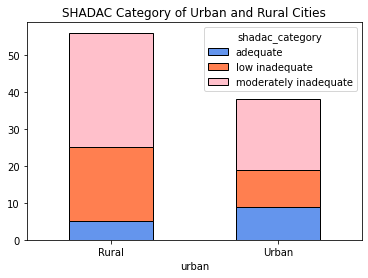

In [94]:
pd.crosstab(physicians_merged['urban'], physicians_merged['shadac_category']).plot(kind = 'bar', 
                                                          stacked = True,       # stacked as opposed to side-by-side
                                                          color = ['cornflowerblue', 'coral', 'pink'],     # change the default colors
                                                          edgecolor = 'black')              # add a border to the bars
plt.title('SHADAC Category of Urban and Rural Cities')                   # add a title
plt.xticks(rotation = 0); 

In [95]:
pd.crosstab(physicians_merged['urban'], physicians_merged['shadac_category'],  normalize = 'index')

shadac_category,adequate,low inadequate,moderately inadequate
urban,,,
Rural,0.089286,0.357143,0.553571
Urban,0.236842,0.263158,0.500000


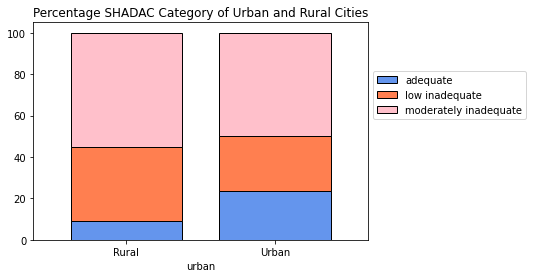

In [96]:
(pd.crosstab(physicians_merged['urban'], physicians_merged['shadac_category'],  normalize = 'index') * 100).plot(kind = 'bar', 
                                                                                        stacked = True,
                                                                                        color = ['cornflowerblue', 'coral', 'pink'],
                                                                                        edgecolor = 'black',
                                                                                        width = 0.75,
                                                                                       )
plt.title('Percentage SHADAC Category of Urban and Rural Cities')
plt.xticks(rotation = 0)
plt.legend(bbox_to_anchor = (1, 0.8), loc = 'upper left');   # move the legend to the right side of the plot

Rural and Urban counties have similar amount of moderately inadequate SHADAC values. However, Rural counties
have lesser adequate and more low inadequate SHADAC values compared to Urban cities. 

In [100]:
Unemployment = pd.read_csv('../data/tn_unemployment.csv')
Unemployment

,laus_code,State,County,Name,Period,LF,Employed,Unemployed,unemployment_rate
0,CN4700100000000,47,1,"Anderson County, TN",Mar-21,34704,33010,1694,4.9
1,CN4700300000000,47,3,"Bedford County, TN",Mar-21,20623,19550,1073,5.2
2,CN4700500000000,47,5,"Benton County, TN",Mar-21,6723,6305,418,6.2
3,CN4700700000000,47,7,"Bledsoe County, TN",Mar-21,4252,3947,305,7.2
4,CN4700900000000,47,9,"Blount County, TN",Mar-21,64098,61119,2979,4.6
...,...,...,...,...,...,...,...,...,...
90,CN4718100000000,47,181,"Wayne County, TN",Mar-21,6416,6074,342,5.3
91,CN4718300000000,47,183,"Weakley County, TN",Mar-21,15494,14783,711,4.6
92,CN4718500000000,47,185,"White County, TN",Mar-21,12085,11484,601,5.0
93,CN4718700000000,47,187,"Williamson County, TN",Mar-21,129484,125213,4271,3.3


In [103]:
Unemployment['Name'] = Unemployment['Name'].str.split(' ', expand = True)[0]
Unemployment

,laus_code,State,County,Name,Period,LF,Employed,Unemployed,unemployment_rate
0,CN4700100000000,47,1,Anderson,Mar-21,34704,33010,1694,4.9
1,CN4700300000000,47,3,Bedford,Mar-21,20623,19550,1073,5.2
2,CN4700500000000,47,5,Benton,Mar-21,6723,6305,418,6.2
3,CN4700700000000,47,7,Bledsoe,Mar-21,4252,3947,305,7.2
4,CN4700900000000,47,9,Blount,Mar-21,64098,61119,2979,4.6
...,...,...,...,...,...,...,...,...,...
90,CN4718100000000,47,181,Wayne,Mar-21,6416,6074,342,5.3
91,CN4718300000000,47,183,Weakley,Mar-21,15494,14783,711,4.6
92,CN4718500000000,47,185,White,Mar-21,12085,11484,601,5.0
93,CN4718700000000,47,187,Williamson,Mar-21,129484,125213,4271,3.3


In [105]:
physicians_unemployment=pd.merge(left = physicians_merged,
         right = Unemployment[['Name', 'unemployment_rate']].rename(columns = {'Name': 'county'}))
physicians_unemployment

,FIPS,state,county,primary_care_physicians,population,urban,Nu_residents_per_physician,shadac_category,unemployment_rate
0,47001,TENNESSEE,Anderson,39.0,76061,Urban,1950.282051,moderately inadequate,4.9
1,47003,TENNESSEE,Bedford,15.0,48292,Rural,3219.466667,moderately inadequate,5.2
2,47005,TENNESSEE,Benton,3.0,16140,Rural,5380.000000,low inadequate,6.2
3,47007,TENNESSEE,Bledsoe,1.0,14836,Rural,14836.000000,low inadequate,7.2
4,47009,TENNESSEE,Blount,90.0,129927,Urban,1443.633333,adequate,4.6
...,...,...,...,...,...,...,...,...,...
89,47181,TENNESSEE,Wayne,5.0,16693,Rural,3338.600000,moderately inadequate,5.3
90,47183,TENNESSEE,Weakley,18.0,33510,Rural,1861.666667,moderately inadequate,4.6
91,47185,TENNESSEE,White,9.0,26800,Rural,2977.777778,moderately inadequate,5.0
92,47187,TENNESSEE,Williamson,338.0,225389,Urban,666.831361,adequate,3.3


In [95]:
k=0
l=0
m=0
for x in Nu_residents_per_physician:
    print(x)
    if x < 1500
        k=k+1

    
        

SyntaxError: invalid syntax (<ipython-input-95-56ee91239c13>, line 6)